<Axes: xlabel='decimal_date', ylabel='average'>

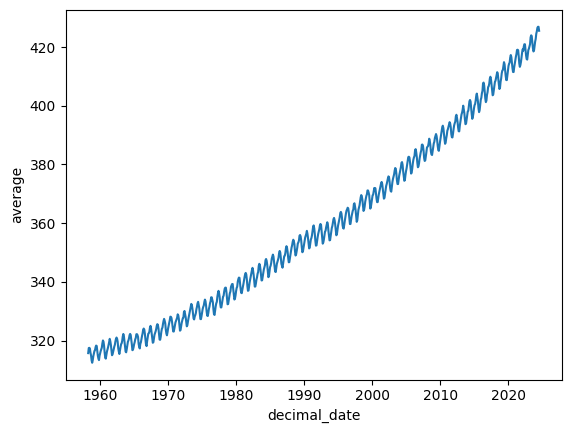

In [1]:
import pandas as pd 
import seaborn as sns
columns = ['year', 'month', 'decimal_date', 'average', 'smooth', 'std_days', 'uncertainty_monthly_mean', 'empty']
df = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt", sep="\s+", comment="#", names= columns)
df.to_csv("data.csv") # pandas_ai isn't good at guessing parsing

# manual
sns.lineplot(df, x = "decimal_date", y="average")

In [2]:
from pandasai import SmartDataframe # requires 1.x numpy
from pandasai.llm import OpenAI

In [3]:
import streamlit as st
llm = OpenAI(api_token=st.secrets["OPENAI_API_KEY"])
pandas_ai = SmartDataframe("data.csv", 
              config={
                      "llm": llm, 
                      "save_charts": False,
                      "verbose": False
                      }
            )

In [4]:
llm.model

'gpt-4o-mini'

'/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png'

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


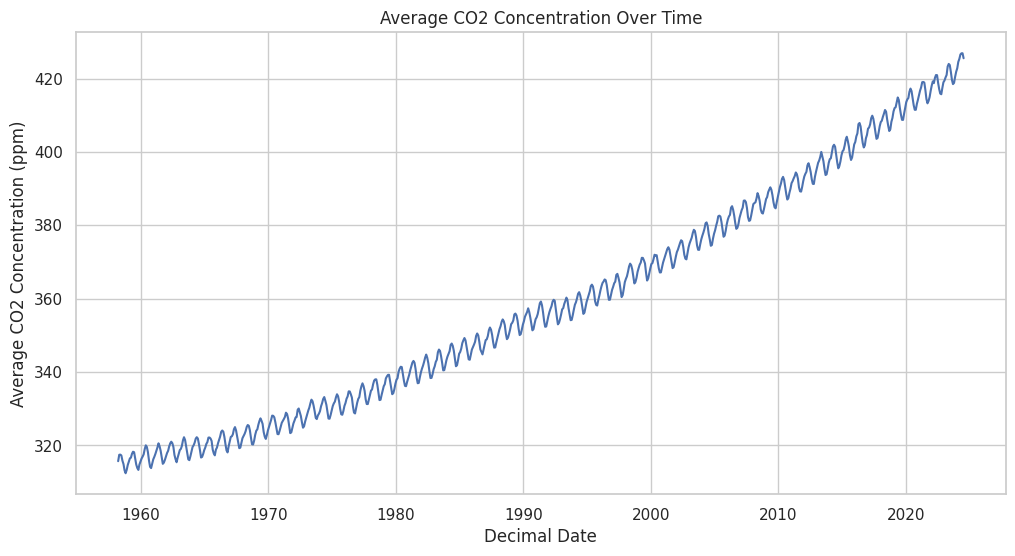

In [5]:
pandas_ai.chat("Plot the average CO2 concentration over time (decimal_date) using seaborn lineplot (no point markers)")

In [6]:
print(pandas_ai.last_code_generated)

df = dfs[0]
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='decimal_date', y='average', marker=None)
plt.title('Average CO2 Concentration Over Time')
plt.xlabel('Decimal Date')
plt.ylabel('Average CO2 Concentration (ppm)')
plt.savefig('/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png')
result = {'type': 'plot', 'value': '/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png'}


'/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png'

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


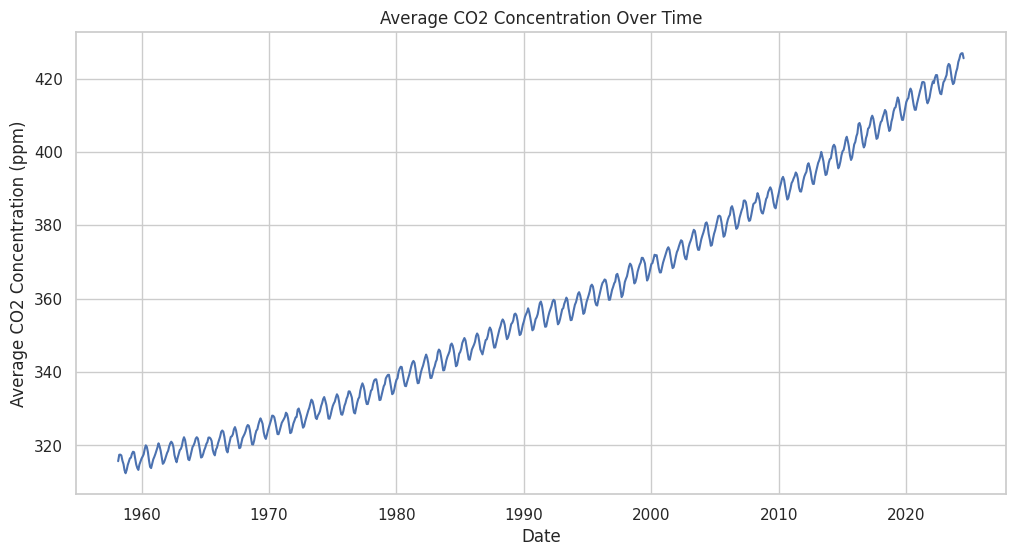

In [7]:
pandas_ai.chat("add a column reformatting decimal_date as a datetime type")

In [8]:
print(pandas_ai.last_code_generated)

df = pd.concat(dfs, ignore_index=True)
df['date'] = pd.to_datetime(df['decimal_date'], format='%Y.%m%d')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='average', marker=None)
plt.title('Average CO2 Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('Average CO2 Concentration (ppm)')
plt.savefig('/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png')
result = {'type': 'plot', 'value': '/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png'}


In [9]:
pandas_ai.chat("Which months have the highest annual CO2? Which have the lowest? Be sure to subtract the annual trend (smooth) first.  ")

'The month with the highest annual CO2 is month 5.0 with an average of 3.08. The month with the lowest annual CO2 is month 10.0 with an average of -3.26.'

In [10]:
print(pandas_ai.last_code_generated)

df = pd.concat(dfs, ignore_index=True)
df['adjusted'] = df['average'] - df['smooth']
monthly_avg = df.groupby('month')['adjusted'].mean().reset_index()
highest_month = monthly_avg.loc[monthly_avg['adjusted'].idxmax()]
lowest_month = monthly_avg.loc[monthly_avg['adjusted'].idxmin()]
result = {'type': 'string', 'value': f"The month with the highest annual CO2 is month {highest_month['month']} with an average of {highest_month['adjusted']:.2f}. The month with the lowest annual CO2 is month {lowest_month['month']} with an average of {lowest_month['adjusted']:.2f}."}
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg['month'], monthly_avg['adjusted'], color='skyblue')
plt.title('Average Adjusted CO2 Concentration by Month')
plt.xlabel('Month')
plt.ylabel('Adjusted CO2 Concentration')
plt.xticks(monthly_avg['month'])
plt.grid(axis='y')
plt.savefig('/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png')
plt.close()
result


'/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png'

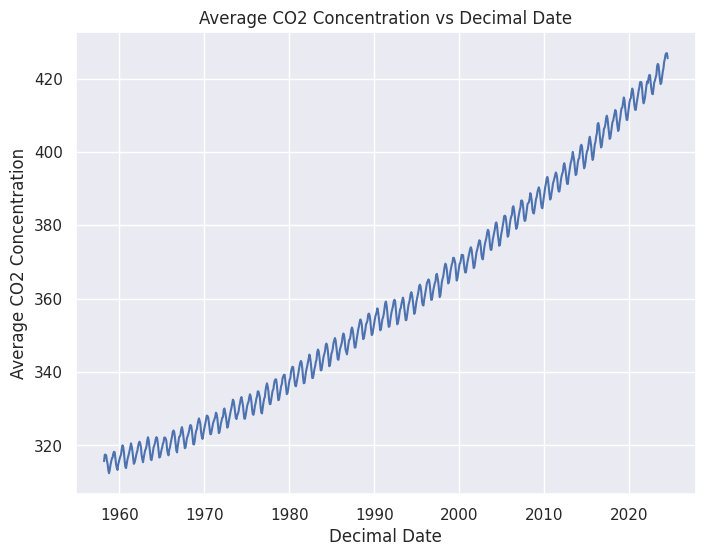

In [11]:
from pandasai import SmartDataframe
from pandasai.llm.local_llm import LocalLLM

ollama_llm = LocalLLM(api_base="http://localhost:11434/v1", model="llama3.1:8b")
df = SmartDataframe("data.csv", config={"llm": ollama_llm})

df.chat("Plot the average CO2 concentration vs decimal_date using seaborn")

In [12]:
print(df.last_code_generated)

result = {}
for df in dfs:
    sns.set()
    plt.figure(figsize=(8, 6))
    sns.lineplot(x='decimal_date', y='average', data=df)
    plt.title('Average CO2 Concentration vs Decimal Date')
    plt.xlabel('Decimal Date')
    plt.ylabel('Average CO2 Concentration')
    plt.grid(True)
    result = {'type': 'string', 'value': '/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png'}
    plt.savefig(result['value'])


The month(s) with the highest annual average CO2 is: 5.0 of year 2017.0
With an average of: 3.52 ppm
The month(s) with the lowest annual average CO2 is: 9.0 of year 2016.0
With an average of: -3.62 ppm
{'type': 'string', 'value': 'The month(s) with the highest annual average CO2 is: 5.0 of year 2017.0. The month(s) with the lowest annual average CO2 is: 9.0 of year 2016.0 (png chart saved as /home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png)'}


'The month(s) with the highest annual average CO2 is: 5.0 of year 2017.0. The month(s) with the lowest annual average CO2 is: 9.0 of year 2016.0 (png chart saved as /home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png)'

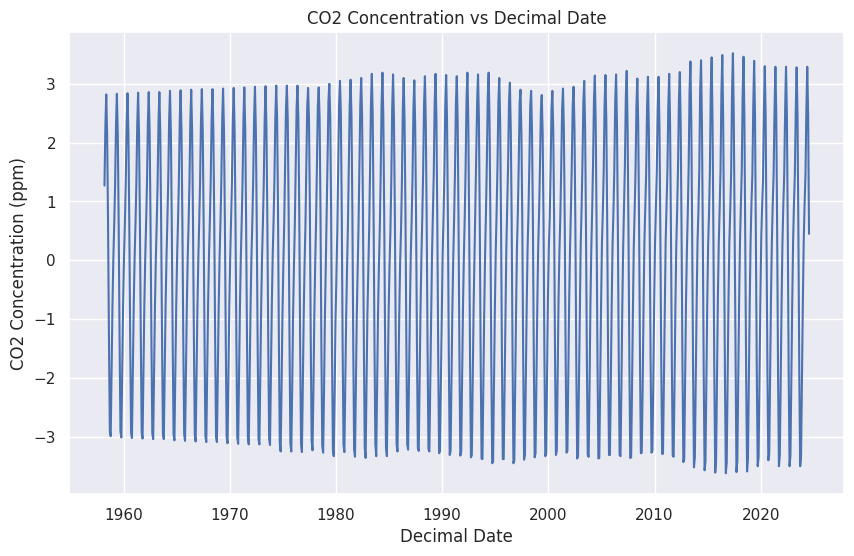

In [13]:
df.chat("Which months have the highest annual average CO2? Which have the lowest monthly average CO2? Be sure to subtract the annual trend (smooth) first.")

In [14]:
print(df.last_code_generated)

dfs[0]['average_diff'] = dfs[0]['average'] - dfs[0]['smooth']
monthly_averages = dfs[0].groupby(['month', 'year']).agg({'average_diff': 'mean'}).reset_index()
highest_month_average = monthly_averages.loc[monthly_averages['average_diff'].idxmax()]
lowest_month_average = monthly_averages.loc[monthly_averages['average_diff'].idxmin()]
print(f"The month(s) with the highest annual average CO2 is: {highest_month_average['month']} of year {highest_month_average['year']}")
print(f"With an average of: {highest_month_average['average_diff']:.2f} ppm")
print(f"The month(s) with the lowest annual average CO2 is: {lowest_month_average['month']} of year {lowest_month_average['year']}")
print(f"With an average of: {lowest_month_average['average_diff']:.2f} ppm")
plt.figure(figsize=(10, 6))
sns.lineplot(x='decimal_date', y='average_diff', data=dfs[0])
plt.title('CO2 Concentration vs Decimal Date')
plt.xlabel('Decimal Date')
plt.ylabel('CO2 Concentration (ppm)')
plt.savefig('/home/rstudio/cboettig/pand